In [1]:
!pip install -q tflite-model-maker

In [2]:
import os

import numpy as np

import tensorflow as tf

assert tf.__version__.startswith('2')

from tflite_model_maker import model_spec
from tflite_model_maker import image_classifier
from tflite_model_maker.config import ExportFormat
from tflite_model_maker.config import QuantizationConfig
from tflite_model_maker.image_classifier import DataLoader

import matplotlib.pyplot as plt

C:\HI_Course\python_file\lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.9.0 and strictly below 2.12.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.7.4 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(


In [3]:
image_path = tf.keras.utils.get_file(
      'flower_photos.tgz',
      'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
      extract=True)
image_path = os.path.join(os.path.dirname(image_path), 'flower_photos')

In [4]:
data = DataLoader.from_folder(image_path)
train_data, test_data = data.split(0.9)

INFO:tensorflow:Load image with size: 3670, num_label: 5, labels: daisy, dandelion, roses, sunflowers, tulips.


In [5]:
model = image_classifier.create(train_data)

INFO:tensorflow:Retraining the models...
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2 (HubKe  (None, 1280)             3413024   
 rasLayerV1V2)                                                   
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 3,419,429
Trainable params: 6,405
Non-trainable params: 3,413,024
_________________________________________________________________
None
Epoch 1/5


C:\Users\deepa\AppData\Roaming\Python\Python39\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


103/103 [==============================] - 49s 458ms/step - loss: 0.8696 - accuracy: 0.7740
Epoch 2/5
103/103 [==============================] - 44s 428ms/step - loss: 0.6562 - accuracy: 0.8993
Epoch 3/5
103/103 [==============================] - 44s 425ms/step - loss: 0.6317 - accuracy: 0.9059
Epoch 4/5
103/103 [==============================] - 44s 423ms/step - loss: 0.6040 - accuracy: 0.9263
Epoch 5/5
103/103 [==============================] - 43s 416ms/step - loss: 0.5900 - accuracy: 0.9375


In [6]:
loss, accuracy = model.evaluate(test_data)

12/12 [==============================] - 6s 413ms/step - loss: 0.5790 - accuracy: 0.9373


In [7]:
model.export(export_dir='.')

INFO:tensorflow:Assets written to: C:\Users\deepa\AppData\Local\Temp\tmppvkndgg6\assets


INFO:tensorflow:Assets written to: C:\Users\deepa\AppData\Local\Temp\tmppvkndgg6\assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in C:\Users\deepa\AppData\Local\Temp\tmpygmyclp4\labels.txt


INFO:tensorflow:Saving labels in C:\Users\deepa\AppData\Local\Temp\tmpygmyclp4\labels.txt


INFO:tensorflow:TensorFlow Lite model exported successfully: .\model.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: .\model.tflite


In [8]:
image_path = tf.keras.utils.get_file(
      'flower_photos.tgz',
      'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
      extract=True)
image_path = os.path.join(os.path.dirname(image_path), 'flower_photos')

In [9]:
data = DataLoader.from_folder(image_path)

INFO:tensorflow:Load image with size: 3670, num_label: 5, labels: daisy, dandelion, roses, sunflowers, tulips.


INFO:tensorflow:Load image with size: 3670, num_label: 5, labels: daisy, dandelion, roses, sunflowers, tulips.


In [10]:
train_data, rest_data = data.split(0.8)
validation_data, test_data = rest_data.split(0.5)

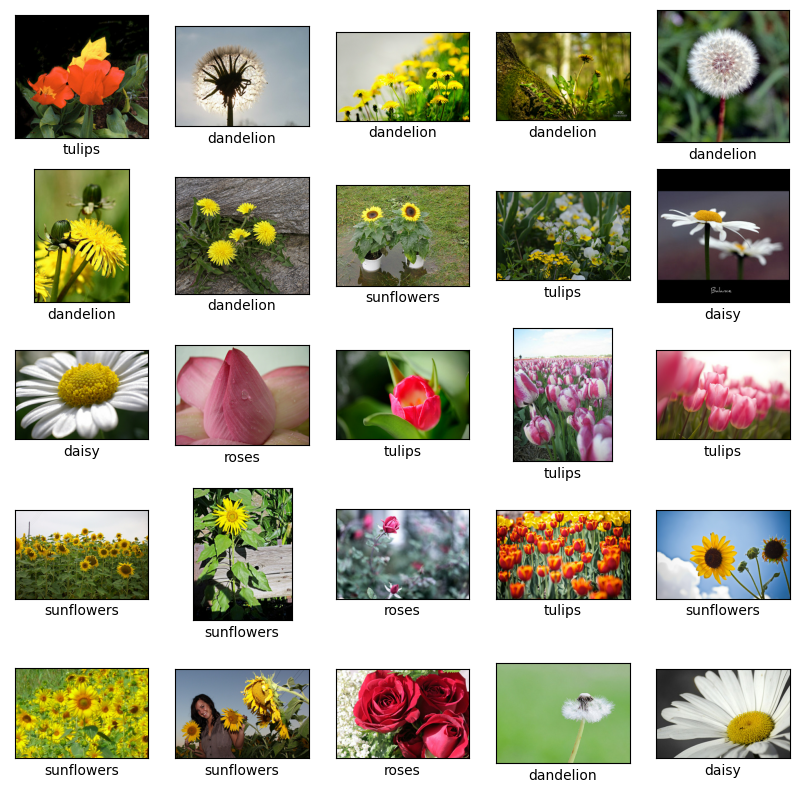

In [11]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(data.gen_dataset().unbatch().take(25)):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)
  plt.xlabel(data.index_to_label[label.numpy()])
plt.show()

In [12]:
model = image_classifier.create(train_data, validation_data=validation_data)

INFO:tensorflow:Retraining the models...


INFO:tensorflow:Retraining the models...


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2_1 (Hub  (None, 1280)             3413024   
 KerasLayerV1V2)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 1280)              0         
                                                                 
 dense_1 (Dense)             (None, 5)                 6405      
                                                                 
Total params: 3,419,429
Trainable params: 6,405
Non-trainable params: 3,413,024
_________________________________________________________________
None
Epoch 1/5


C:\Users\deepa\AppData\Roaming\Python\Python39\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


91/91 [==============================] - 49s 523ms/step - loss: 0.8785 - accuracy: 0.7648 - val_loss: 0.7458 - val_accuracy: 0.8447
Epoch 2/5
91/91 [==============================] - 45s 492ms/step - loss: 0.6594 - accuracy: 0.8901 - val_loss: 0.7005 - val_accuracy: 0.8774
Epoch 3/5
91/91 [==============================] - 44s 486ms/step - loss: 0.6192 - accuracy: 0.9121 - val_loss: 0.6824 - val_accuracy: 0.8856
Epoch 4/5
91/91 [==============================] - 44s 487ms/step - loss: 0.6009 - accuracy: 0.9217 - val_loss: 0.6729 - val_accuracy: 0.8801
Epoch 5/5
91/91 [==============================] - 44s 480ms/step - loss: 0.5812 - accuracy: 0.9341 - val_loss: 0.6712 - val_accuracy: 0.8692


In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2_1 (Hub  (None, 1280)             3413024   
 KerasLayerV1V2)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 1280)              0         
                                                                 
 dense_1 (Dense)             (None, 5)                 6405      
                                                                 
Total params: 3,419,429
Trainable params: 6,405
Non-trainable params: 3,413,024
_________________________________________________________________


In [14]:
loss, accuracy = model.evaluate(test_data)

12/12 [==============================] - 7s 447ms/step - loss: 0.6056 - accuracy: 0.9046


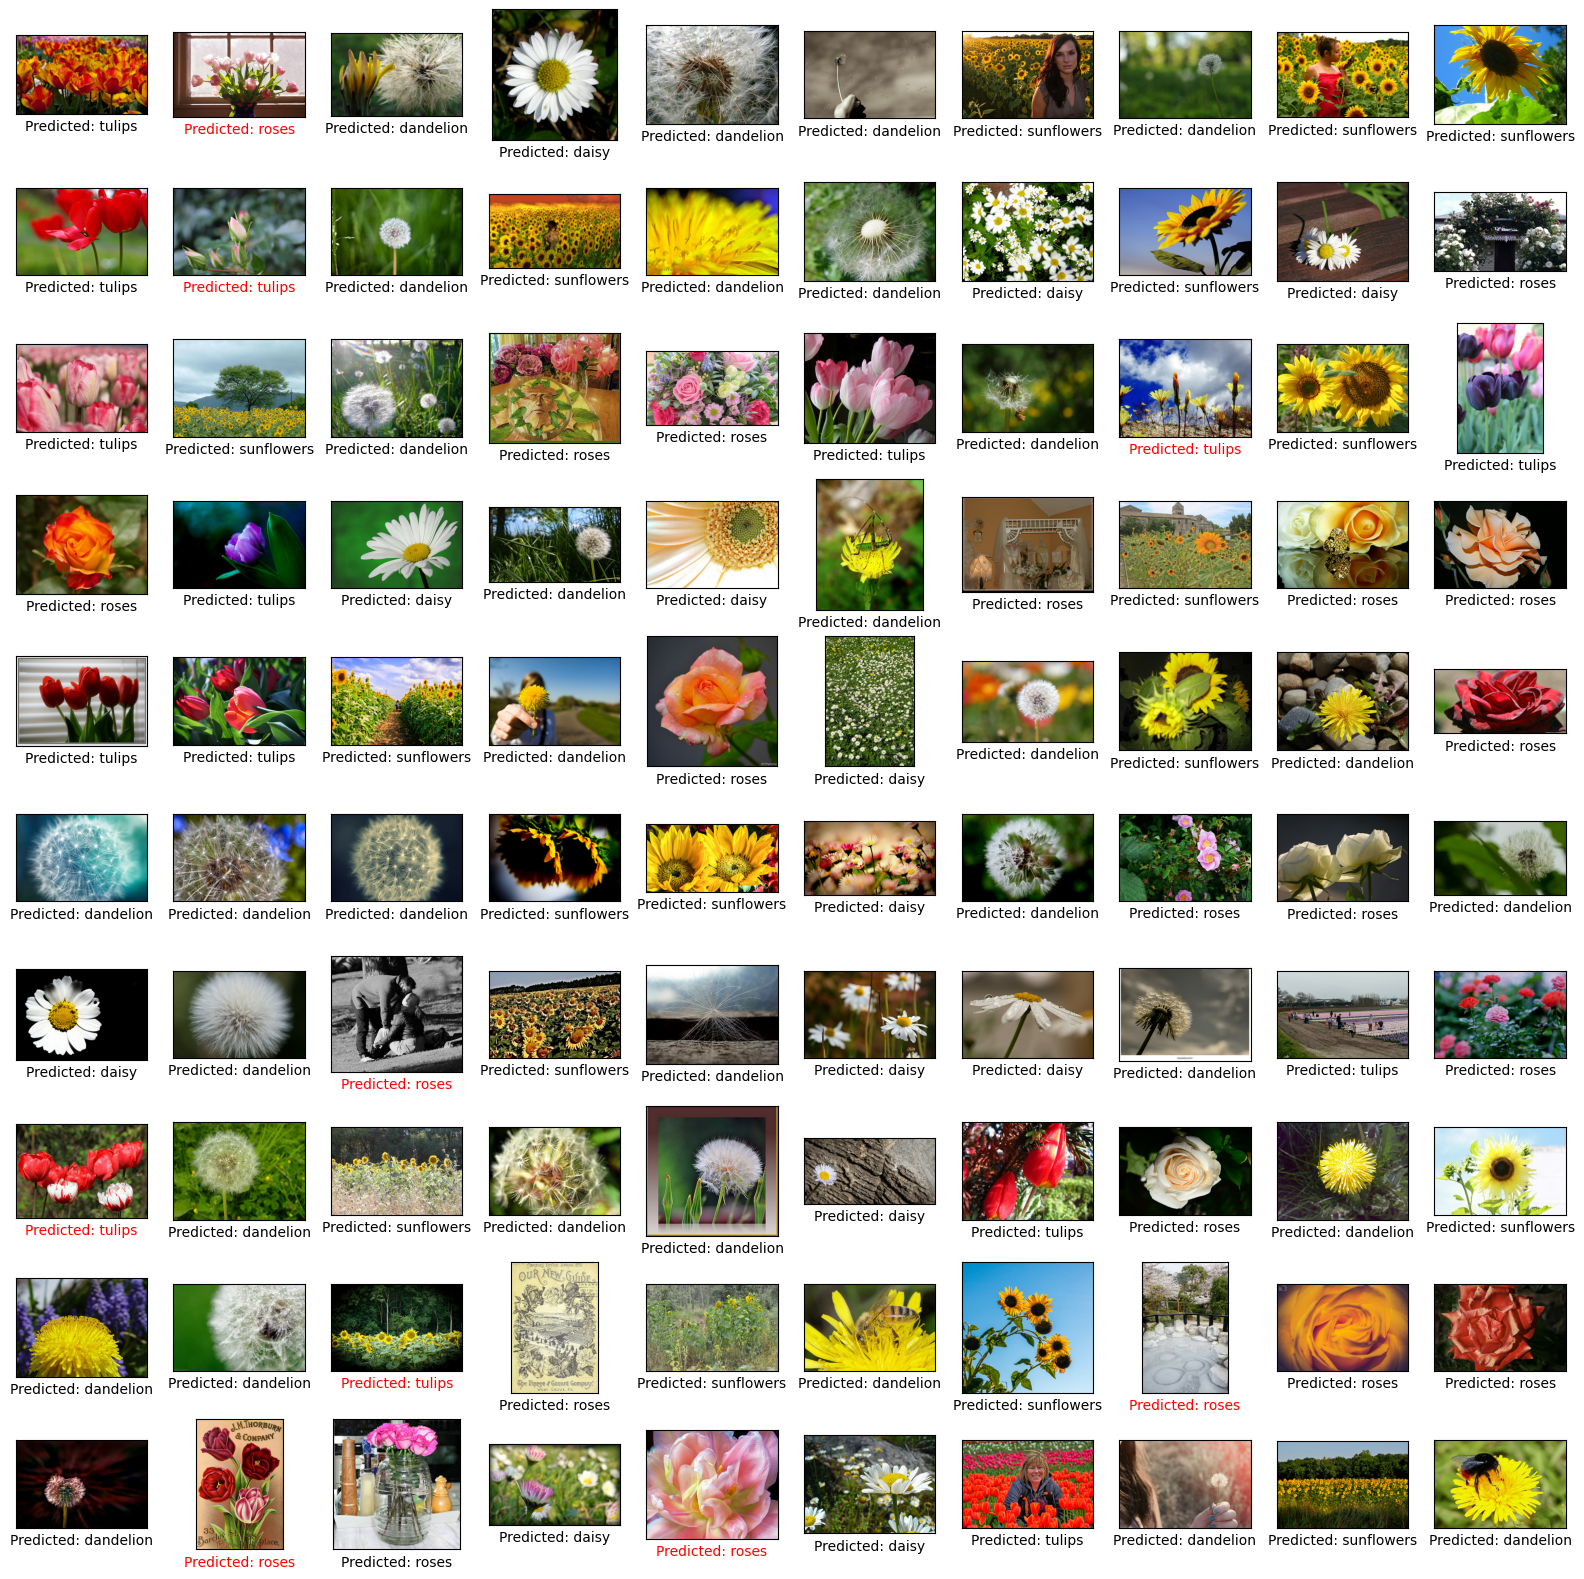

In [15]:
# A helper function that returns 'red'/'black' depending on if its two input
# parameter matches or not.
def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'

# Then plot 100 test images and their predicted labels.
# If a prediction result is different from the label provided label in "test"
# dataset, we will highlight it in red color.
plt.figure(figsize=(20, 20))
predicts = model.predict_top_k(test_data)
for i, (image, label) in enumerate(test_data.gen_dataset().unbatch().take(100)):
  ax = plt.subplot(10, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)

  predict_label = predicts[i][0][0]
  color = get_label_color(predict_label,
                          test_data.index_to_label[label.numpy()])
  ax.xaxis.label.set_color(color)
  plt.xlabel('Predicted: %s' % predict_label)
plt.savefig(r'C:\HI_Course\Sem4SoftwareEnggTechn\UI\assignment5_py_files\flower_model.png')
plt.show()

In [18]:
model.export(export_dir='C:\\HI_Course\\Sem4SoftwareEnggTechn\\UI\\assignment5_py_files')

INFO:tensorflow:Assets written to: C:\Users\deepa\AppData\Local\Temp\tmpbq8zbxa1\assets


INFO:tensorflow:Assets written to: C:\Users\deepa\AppData\Local\Temp\tmpbq8zbxa1\assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in C:\Users\deepa\AppData\Local\Temp\tmpcvue7rsa\labels.txt


INFO:tensorflow:Saving labels in C:\Users\deepa\AppData\Local\Temp\tmpcvue7rsa\labels.txt


INFO:tensorflow:TensorFlow Lite model exported successfully: C:\HI_Course\Sem4SoftwareEnggTechn\UI\assignment5_py_files\model.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: C:\HI_Course\Sem4SoftwareEnggTechn\UI\assignment5_py_files\model.tflite
